In [1]:
import numpy as np
import sys
sys.path.append('/eagle/fthmc/run')
from Scaling_FT_HMC.utils.func import auto_from_chi
from lametlat.utils.plot_settings import *

### L64 b3

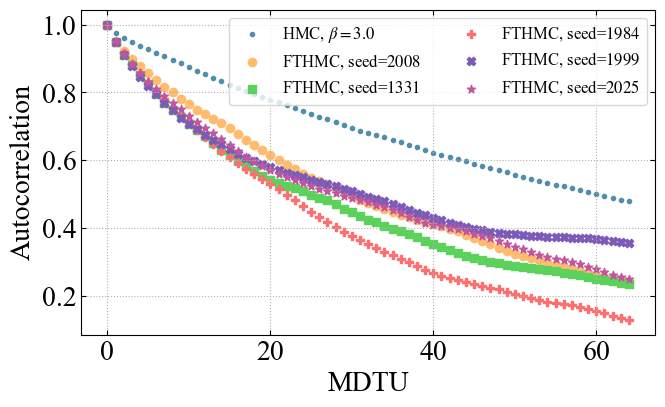

In [2]:
hmc_L64_b3_topo = np.loadtxt('/eagle/fthmc/run/Scaling_FT_HMC/scaling/dumps/topo_hmc_L64_beta3.0.csv')
fthmc_base_L64_b3_topo_2008 = np.loadtxt('/eagle/fthmc/run/Scaling_FT_HMC/scaling/dumps/topo_fthmc_L64_beta3.0_base_train_b3.0_L32_2008.csv')
fthmc_base_L64_b3_topo_1331 = np.loadtxt('/eagle/fthmc/run/Scaling_FT_HMC/scaling/dumps/topo_fthmc_L64_beta3.0_base_train_b3.0_L32_1331.csv')
fthmc_base_L64_b3_topo_1984 = np.loadtxt('/eagle/fthmc/run/Scaling_FT_HMC/scaling/dumps/topo_fthmc_L64_beta3.0_base_train_b3.0_L32_1984.csv')
fthmc_base_L64_b3_topo_1999 = np.loadtxt('/eagle/fthmc/run/Scaling_FT_HMC/scaling/dumps/topo_fthmc_L64_beta3.0_base_train_b3.0_L32_1999.csv')
fthmc_base_L64_b3_topo_2025 = np.loadtxt('/eagle/fthmc/run/Scaling_FT_HMC/scaling/dumps/topo_fthmc_L64_beta3.0_base_train_b3.0_L32_2025.csv')

volume = 64**2

hmc_L64_b3_auto = auto_from_chi(hmc_L64_b3_topo, max_lag=64, beta=3.0, volume=volume)
fthmc_base_L64_b3_auto_2008 = auto_from_chi(fthmc_base_L64_b3_topo_2008, max_lag=64, beta=3.0, volume=volume)
fthmc_base_L64_b3_auto_1331 = auto_from_chi(fthmc_base_L64_b3_topo_1331, max_lag=64, beta=3.0, volume=volume)
fthmc_base_L64_b3_auto_1984 = auto_from_chi(fthmc_base_L64_b3_topo_1984, max_lag=64, beta=3.0, volume=volume)
fthmc_base_L64_b3_auto_1999 = auto_from_chi(fthmc_base_L64_b3_topo_1999, max_lag=64, beta=3.0, volume=volume)
fthmc_base_L64_b3_auto_2025 = auto_from_chi(fthmc_base_L64_b3_topo_2025, max_lag=64, beta=3.0, volume=volume)


fig, ax = default_plot()
ax.scatter(np.arange(len(hmc_L64_b3_auto)), hmc_L64_b3_auto, label='HMC, $\\beta=3.0$', marker=marker_ls[0], color=color_ls[0])
ax.scatter(np.arange(len(fthmc_base_L64_b3_auto_2008)), fthmc_base_L64_b3_auto_2008, label='FTHMC, seed=$2008$', marker=marker_ls[1], color=color_ls[1])
ax.scatter(np.arange(len(fthmc_base_L64_b3_auto_1331)), fthmc_base_L64_b3_auto_1331, label='FTHMC, seed=$1331$', marker=marker_ls[2], color=color_ls[2])
ax.scatter(np.arange(len(fthmc_base_L64_b3_auto_1984)), fthmc_base_L64_b3_auto_1984, label='FTHMC, seed=$1984$', marker=marker_ls[3], color=color_ls[3])
ax.scatter(np.arange(len(fthmc_base_L64_b3_auto_1999)), fthmc_base_L64_b3_auto_1999, label='FTHMC, seed=$1999$', marker=marker_ls[4], color=color_ls[4])
ax.scatter(np.arange(len(fthmc_base_L64_b3_auto_2025)), fthmc_base_L64_b3_auto_2025, label='FTHMC, seed=$2025$', marker=marker_ls[5], color=color_ls[5])


# ax.set_ylim(-0.05, 1.2)
ax.legend(ncol=2, loc='upper right', fontsize=12)
ax.set_xlabel('MDTU', **fs_p)
ax.set_ylabel('Autocorrelation', **fs_p)
plt.tight_layout()
plt.savefig('plots/autocorrelation_L64_b3.pdf', transparent=True)
plt.show()


In [3]:

gamma_hmc = 1 / (1 - hmc_L64_b3_auto[16])
gamma_fthmc_2008 = 1 / (1 - fthmc_base_L64_b3_auto_2008[16])
gamma_fthmc_1331 = 1 / (1 - fthmc_base_L64_b3_auto_1331[16])
gamma_fthmc_1984 = 1 / (1 - fthmc_base_L64_b3_auto_1984[16])
gamma_fthmc_1999 = 1 / (1 - fthmc_base_L64_b3_auto_1999[16])
gamma_fthmc_2025 = 1 / (1 - fthmc_base_L64_b3_auto_2025[16])

gamma_ratio_2008 = gamma_hmc / gamma_fthmc_2008
gamma_ratio_1331 = gamma_hmc / gamma_fthmc_1331
gamma_ratio_1984 = gamma_hmc / gamma_fthmc_1984
gamma_ratio_1999 = gamma_hmc / gamma_fthmc_1999
gamma_ratio_2025 = gamma_hmc / gamma_fthmc_2025

gamma_ratio_L64_b3_mean = np.mean([gamma_ratio_2008, gamma_ratio_1331, gamma_ratio_1984, gamma_ratio_1999, gamma_ratio_2025])
gamma_ratio_L64_b3_std = np.std([gamma_ratio_2008, gamma_ratio_1331, gamma_ratio_1984, gamma_ratio_1999, gamma_ratio_2025])


print(">>> gamma ratio (16)")
print(f"gamma ratio (16) for L64 b3: {gamma_ratio_2008}, {gamma_ratio_1331}, {gamma_ratio_1984}, {gamma_ratio_1999}, {gamma_ratio_2025}")
print(f"mean(16) for L64 b3: {gamma_ratio_L64_b3_mean}")
print(f"std(16) for L64 b3: {gamma_ratio_L64_b3_std}")

deltaQ_hmc = [ abs(hmc_L64_b3_topo[i] - hmc_L64_b3_topo[i-1]) for i in range(1, len(hmc_L64_b3_topo))]
deltaQ_fthmc_2008 = [ abs(fthmc_base_L64_b3_topo_2008[i] - fthmc_base_L64_b3_topo_2008[i-1]) for i in range(1, len(fthmc_base_L64_b3_topo_2008))]
deltaQ_fthmc_1331 = [ abs(fthmc_base_L64_b3_topo_1331[i] - fthmc_base_L64_b3_topo_1331[i-1]) for i in range(1, len(fthmc_base_L64_b3_topo_1331))]
deltaQ_fthmc_1984 = [ abs(fthmc_base_L64_b3_topo_1984[i] - fthmc_base_L64_b3_topo_1984[i-1]) for i in range(1, len(fthmc_base_L64_b3_topo_1984))]
deltaQ_fthmc_1999 = [ abs(fthmc_base_L64_b3_topo_1999[i] - fthmc_base_L64_b3_topo_1999[i-1]) for i in range(1, len(fthmc_base_L64_b3_topo_1999))]
deltaQ_fthmc_2025 = [ abs(fthmc_base_L64_b3_topo_2025[i] - fthmc_base_L64_b3_topo_2025[i-1]) for i in range(1, len(fthmc_base_L64_b3_topo_2025))]

deltaQ_hmc_L64_b3_mean = np.mean(deltaQ_hmc)
deltaQ_fthmc_L64_b3_mean = np.mean([np.mean(deltaQ_fthmc_2008), np.mean(deltaQ_fthmc_1331), np.mean(deltaQ_fthmc_1984), np.mean(deltaQ_fthmc_1999), np.mean(deltaQ_fthmc_2025)])
deltaQ_fthmc_L64_b3_std = np.std([np.mean(deltaQ_fthmc_2008), np.mean(deltaQ_fthmc_1331), np.mean(deltaQ_fthmc_1984), np.mean(deltaQ_fthmc_1999), np.mean(deltaQ_fthmc_2025)])


print("\n>>> deltaQ")
print(f"deltaQ for HMC L64 b3: {np.mean(deltaQ_hmc)}")
print(f"deltaQ for FTHMC L64 b3: {np.mean(deltaQ_fthmc_2008)}, {np.mean(deltaQ_fthmc_1331)}, {np.mean(deltaQ_fthmc_1984)}, {np.mean(deltaQ_fthmc_1999)}, {np.mean(deltaQ_fthmc_2025)}")
print(f"mean(deltaQ) for FTHMC L64 b3: {deltaQ_fthmc_L64_b3_mean}")
print(f"std(deltaQ) for FTHMC L64 b3: {deltaQ_fthmc_L64_b3_std}")

>>> gamma ratio (16)
gamma ratio (16) for L64 b3: 1.7278200712073408, 2.1538917995773876, 2.1885113034416883, 2.038585115929024, 1.9935016065070768
mean(16) for L64 b3: 2.0204619793325036
std(16) for L64 b3: 0.16293476512902594

>>> deltaQ
deltaQ for HMC L64 b3: 0.9391941391941392
deltaQ for FTHMC L64 b3: 1.5919413919413918, 1.3694749694749695, 1.3206349206349206, 1.348962148962149, 1.2971916971916972
mean(deltaQ) for FTHMC L64 b3: 1.3856410256410254
std(deltaQ) for FTHMC L64 b3: 0.10603357948617553


### L64 b4

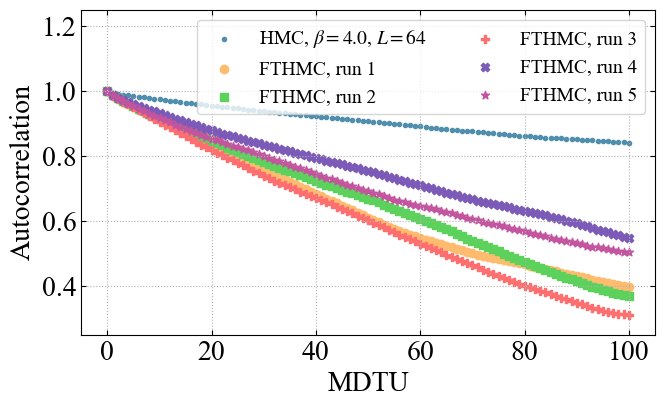

In [15]:
hmc_L64_b4_topo = np.loadtxt('/eagle/fthmc/run/Scaling_FT_HMC/scaling/dumps/topo_hmc_L64_beta4.0.csv')
fthmc_base_L64_b4_topo_2008 = np.loadtxt('/eagle/fthmc/run/Scaling_FT_HMC/scaling/dumps/topo_fthmc_L64_beta4.0_base_train_b3.0_L32_2008.csv')
fthmc_base_L64_b4_topo_1331 = np.loadtxt('/eagle/fthmc/run/Scaling_FT_HMC/scaling/dumps/topo_fthmc_L64_beta4.0_base_train_b3.0_L32_1331.csv')
fthmc_base_L64_b4_topo_1984 = np.loadtxt('/eagle/fthmc/run/Scaling_FT_HMC/scaling/dumps/topo_fthmc_L64_beta4.0_base_train_b3.0_L32_1984.csv')
fthmc_base_L64_b4_topo_1999 = np.loadtxt('/eagle/fthmc/run/Scaling_FT_HMC/scaling/dumps/topo_fthmc_L64_beta4.0_base_train_b3.0_L32_1999.csv')
fthmc_base_L64_b4_topo_2025 = np.loadtxt('/eagle/fthmc/run/Scaling_FT_HMC/scaling/dumps/topo_fthmc_L64_beta4.0_base_train_b3.0_L32_2025.csv')

max_lag = 100
beta = 4.0
volume = 64**2

hmc_L64_b4_auto = auto_from_chi(hmc_L64_b4_topo, max_lag=max_lag, beta=4.0, volume=volume)
fthmc_base_L64_b4_auto_2008 = auto_from_chi(fthmc_base_L64_b4_topo_2008, max_lag=max_lag, beta=4.0, volume=volume)
fthmc_base_L64_b4_auto_1331 = auto_from_chi(fthmc_base_L64_b4_topo_1331, max_lag=max_lag, beta=4.0, volume=volume)
fthmc_base_L64_b4_auto_1984 = auto_from_chi(fthmc_base_L64_b4_topo_1984, max_lag=max_lag, beta=4.0, volume=volume)
fthmc_base_L64_b4_auto_1999 = auto_from_chi(fthmc_base_L64_b4_topo_1999, max_lag=max_lag, beta=4.0, volume=volume)
fthmc_base_L64_b4_auto_2025 = auto_from_chi(fthmc_base_L64_b4_topo_2025, max_lag=max_lag, beta=4.0, volume=volume)


fig, ax = default_plot()
ax.scatter(np.arange(len(hmc_L64_b4_auto)), hmc_L64_b4_auto, label='HMC, $\\beta=4.0$, $L=64$', marker=marker_ls[0], color=color_ls[0])
ax.scatter(np.arange(len(fthmc_base_L64_b4_auto_2008)), fthmc_base_L64_b4_auto_2008, label='FTHMC, run 1', marker=marker_ls[1], color=color_ls[1])
ax.scatter(np.arange(len(fthmc_base_L64_b4_auto_1331)), fthmc_base_L64_b4_auto_1331, label='FTHMC, run 2', marker=marker_ls[2], color=color_ls[2])
ax.scatter(np.arange(len(fthmc_base_L64_b4_auto_1984)), fthmc_base_L64_b4_auto_1984, label='FTHMC, run 3', marker=marker_ls[3], color=color_ls[3])
ax.scatter(np.arange(len(fthmc_base_L64_b4_auto_1999)), fthmc_base_L64_b4_auto_1999, label='FTHMC, run 4', marker=marker_ls[4], color=color_ls[4])
ax.scatter(np.arange(len(fthmc_base_L64_b4_auto_2025)), fthmc_base_L64_b4_auto_2025, label='FTHMC, run 5', marker=marker_ls[5], color=color_ls[5])


ax.set_ylim(0.25, 1.25)
ax.legend(ncol=2, loc='upper right', fontsize=14)
ax.set_xlabel('MDTU', **fs_p)
ax.set_ylabel('Autocorrelation', **fs_p)
plt.tight_layout()
plt.savefig('plots/autocorrelation_L64_b4.pdf', transparent=True)
plt.show()


In [5]:
gamma_hmc = 1 / (1 - hmc_L64_b4_auto[16])
gamma_fthmc_2008 = 1 / (1 - fthmc_base_L64_b4_auto_2008[16])
gamma_fthmc_1331 = 1 / (1 - fthmc_base_L64_b4_auto_1331[16])
gamma_fthmc_1984 = 1 / (1 - fthmc_base_L64_b4_auto_1984[16])
gamma_fthmc_1999 = 1 / (1 - fthmc_base_L64_b4_auto_1999[16])
gamma_fthmc_2025 = 1 / (1 - fthmc_base_L64_b4_auto_2025[16])

gamma_ratio_2008 = gamma_hmc / gamma_fthmc_2008
gamma_ratio_1331 = gamma_hmc / gamma_fthmc_1331
gamma_ratio_1984 = gamma_hmc / gamma_fthmc_1984
gamma_ratio_1999 = gamma_hmc / gamma_fthmc_1999
gamma_ratio_2025 = gamma_hmc / gamma_fthmc_2025

gamma_ratio_L64_b4_mean = np.mean([gamma_ratio_2008, gamma_ratio_1331, gamma_ratio_1984, gamma_ratio_1999, gamma_ratio_2025])
gamma_ratio_L64_b4_std = np.std([gamma_ratio_2008, gamma_ratio_1331, gamma_ratio_1984, gamma_ratio_1999, gamma_ratio_2025])


print(">>> gamma ratio (16)")
print(f"gamma ratio (16) for L64 b4: {gamma_ratio_2008}, {gamma_ratio_1331}, {gamma_ratio_1984}, {gamma_ratio_1999}, {gamma_ratio_2025}")
print(f"mean(16) for L64 b4: {gamma_ratio_L64_b4_mean}")
print(f"std(16) for L64 b4: {gamma_ratio_L64_b4_std}")

deltaQ_hmc = [ abs(hmc_L64_b4_topo[i] - hmc_L64_b4_topo[i-1]) for i in range(1, len(hmc_L64_b4_topo))]
deltaQ_fthmc_2008 = [ abs(fthmc_base_L64_b4_topo_2008[i] - fthmc_base_L64_b4_topo_2008[i-1]) for i in range(1, len(fthmc_base_L64_b4_topo_2008))]
deltaQ_fthmc_1331 = [ abs(fthmc_base_L64_b4_topo_1331[i] - fthmc_base_L64_b4_topo_1331[i-1]) for i in range(1, len(fthmc_base_L64_b4_topo_1331))]
deltaQ_fthmc_1984 = [ abs(fthmc_base_L64_b4_topo_1984[i] - fthmc_base_L64_b4_topo_1984[i-1]) for i in range(1, len(fthmc_base_L64_b4_topo_1984))]
deltaQ_fthmc_1999 = [ abs(fthmc_base_L64_b4_topo_1999[i] - fthmc_base_L64_b4_topo_1999[i-1]) for i in range(1, len(fthmc_base_L64_b4_topo_1999))]
deltaQ_fthmc_2025 = [ abs(fthmc_base_L64_b4_topo_2025[i] - fthmc_base_L64_b4_topo_2025[i-1]) for i in range(1, len(fthmc_base_L64_b4_topo_2025))]

deltaQ_hmc_L64_b4_mean = np.mean(deltaQ_hmc)
deltaQ_fthmc_L64_b4_mean = np.mean([np.mean(deltaQ_fthmc_2008), np.mean(deltaQ_fthmc_1331), np.mean(deltaQ_fthmc_1984), np.mean(deltaQ_fthmc_1999), np.mean(deltaQ_fthmc_2025)])
deltaQ_fthmc_L64_b4_std = np.std([np.mean(deltaQ_fthmc_2008), np.mean(deltaQ_fthmc_1331), np.mean(deltaQ_fthmc_1984), np.mean(deltaQ_fthmc_1999), np.mean(deltaQ_fthmc_2025)])


print("\n>>> deltaQ")
print(f"deltaQ for HMC L64 b4: {np.mean(deltaQ_hmc)}")
print(f"deltaQ for FTHMC L64 b4: {np.mean(deltaQ_fthmc_2008)}, {np.mean(deltaQ_fthmc_1331)}, {np.mean(deltaQ_fthmc_1984)}, {np.mean(deltaQ_fthmc_1999)}, {np.mean(deltaQ_fthmc_2025)}")
print(f"mean(deltaQ) for FTHMC L64 b4: {deltaQ_fthmc_L64_b4_mean}")
print(f"std(deltaQ) for FTHMC L64 b4: {deltaQ_fthmc_L64_b4_std}")

>>> gamma ratio (16)
gamma ratio (16) for L64 b4: 3.508165630597405, 3.347803181961857, 3.9227689389948335, 2.6831735328205655, 3.2621430829206592
mean(16) for L64 b4: 3.344810873459064
std(16) for L64 b4: 0.40132958780220457

>>> deltaQ
deltaQ for HMC L64 b4: 0.2647130647130647
deltaQ for FTHMC L64 b4: 0.5643467643467643, 0.5242979242979243, 0.599023199023199, 0.568986568986569, 0.568009768009768
mean(deltaQ) for FTHMC L64 b4: 0.5649328449328449
std(deltaQ) for FTHMC L64 b4: 0.02383104127725199


### L64 b5

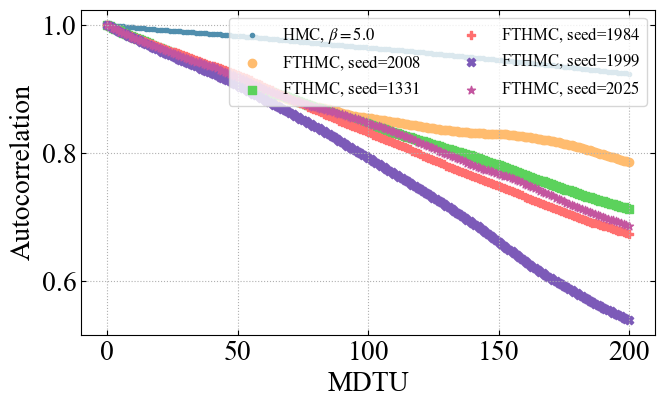

In [6]:
hmc_L64_b5_topo = np.loadtxt('/eagle/fthmc/run/Scaling_FT_HMC/scaling/dumps/topo_hmc_L64_beta5.0.csv')
fthmc_base_L64_b5_topo_2008 = np.loadtxt('/eagle/fthmc/run/Scaling_FT_HMC/scaling/dumps/topo_fthmc_L64_beta5.0_base_train_b3.0_L32_2008.csv')
fthmc_base_L64_b5_topo_1331 = np.loadtxt('/eagle/fthmc/run/Scaling_FT_HMC/scaling/dumps/topo_fthmc_L64_beta5.0_base_train_b3.0_L32_1331.csv')
fthmc_base_L64_b5_topo_1984 = np.loadtxt('/eagle/fthmc/run/Scaling_FT_HMC/scaling/dumps/topo_fthmc_L64_beta5.0_base_train_b3.0_L32_1984.csv')
fthmc_base_L64_b5_topo_1999 = np.loadtxt('/eagle/fthmc/run/Scaling_FT_HMC/scaling/dumps/topo_fthmc_L64_beta5.0_base_train_b3.0_L32_1999.csv')
fthmc_base_L64_b5_topo_2025 = np.loadtxt('/eagle/fthmc/run/Scaling_FT_HMC/scaling/dumps/topo_fthmc_L64_beta5.0_base_train_b3.0_L32_2025.csv')

max_lag = 200
beta = 5.0
volume = 64**2

hmc_L64_b5_auto = auto_from_chi(hmc_L64_b5_topo, max_lag=max_lag, beta=beta, volume=volume)
fthmc_base_L64_b5_auto_2008 = auto_from_chi(fthmc_base_L64_b5_topo_2008, max_lag=max_lag, beta=beta, volume=volume)
fthmc_base_L64_b5_auto_1331 = auto_from_chi(fthmc_base_L64_b5_topo_1331, max_lag=max_lag, beta=beta, volume=volume)
fthmc_base_L64_b5_auto_1984 = auto_from_chi(fthmc_base_L64_b5_topo_1984, max_lag=max_lag, beta=beta, volume=volume)
fthmc_base_L64_b5_auto_1999 = auto_from_chi(fthmc_base_L64_b5_topo_1999, max_lag=max_lag, beta=beta, volume=volume)
fthmc_base_L64_b5_auto_2025 = auto_from_chi(fthmc_base_L64_b5_topo_2025, max_lag=max_lag, beta=beta, volume=volume)


fig, ax = default_plot()
ax.scatter(np.arange(len(hmc_L64_b5_auto)), hmc_L64_b5_auto, label='HMC, $\\beta=5.0$', marker=marker_ls[0], color=color_ls[0])
ax.scatter(np.arange(len(fthmc_base_L64_b5_auto_2008)), fthmc_base_L64_b5_auto_2008, label='FTHMC, seed=$2008$', marker=marker_ls[1], color=color_ls[1])
ax.scatter(np.arange(len(fthmc_base_L64_b5_auto_1331)), fthmc_base_L64_b5_auto_1331, label='FTHMC, seed=$1331$', marker=marker_ls[2], color=color_ls[2])
ax.scatter(np.arange(len(fthmc_base_L64_b5_auto_1984)), fthmc_base_L64_b5_auto_1984, label='FTHMC, seed=$1984$', marker=marker_ls[3], color=color_ls[3])
ax.scatter(np.arange(len(fthmc_base_L64_b5_auto_1999)), fthmc_base_L64_b5_auto_1999, label='FTHMC, seed=$1999$', marker=marker_ls[4], color=color_ls[4])
ax.scatter(np.arange(len(fthmc_base_L64_b5_auto_2025)), fthmc_base_L64_b5_auto_2025, label='FTHMC, seed=$2025$', marker=marker_ls[5], color=color_ls[5])


# ax.set_ylim(0.75, 1.1)
ax.legend(ncol=2, loc='upper right', fontsize=12)
ax.set_xlabel('MDTU', **fs_p)
ax.set_ylabel('Autocorrelation', **fs_p)
plt.tight_layout()
plt.savefig('plots/autocorrelation_L64_b5.pdf', transparent=True)
plt.show()


In [7]:
gamma_hmc = 1 / (1 - hmc_L64_b5_auto[16])
gamma_fthmc_2008 = 1 / (1 - fthmc_base_L64_b5_auto_2008[16])
gamma_fthmc_1331 = 1 / (1 - fthmc_base_L64_b5_auto_1331[16])
gamma_fthmc_1984 = 1 / (1 - fthmc_base_L64_b5_auto_1984[16])
gamma_fthmc_1999 = 1 / (1 - fthmc_base_L64_b5_auto_1999[16])
gamma_fthmc_2025 = 1 / (1 - fthmc_base_L64_b5_auto_2025[16])

gamma_ratio_2008 = gamma_hmc / gamma_fthmc_2008
gamma_ratio_1331 = gamma_hmc / gamma_fthmc_1331
gamma_ratio_1984 = gamma_hmc / gamma_fthmc_1984
gamma_ratio_1999 = gamma_hmc / gamma_fthmc_1999
gamma_ratio_2025 = gamma_hmc / gamma_fthmc_2025

gamma_ratio_L64_b5_mean = np.mean([gamma_ratio_2008, gamma_ratio_1331, gamma_ratio_1984, gamma_ratio_1999, gamma_ratio_2025])
gamma_ratio_L64_b5_std = np.std([gamma_ratio_2008, gamma_ratio_1331, gamma_ratio_1984, gamma_ratio_1999, gamma_ratio_2025])


print(">>> gamma ratio (16)")
print(f"gamma ratio (16) for L64 b5: {gamma_ratio_2008}, {gamma_ratio_1331}, {gamma_ratio_1984}, {gamma_ratio_1999}, {gamma_ratio_2025}")
print(f"mean(16) for L64 b5: {gamma_ratio_L64_b5_mean}")
print(f"std(16) for L64 b5: {gamma_ratio_L64_b5_std}")

deltaQ_hmc = [ abs(hmc_L64_b5_topo[i] - hmc_L64_b5_topo[i-1]) for i in range(1, len(hmc_L64_b5_topo))]
deltaQ_fthmc_2008 = [ abs(fthmc_base_L64_b5_topo_2008[i] - fthmc_base_L64_b5_topo_2008[i-1]) for i in range(1, len(fthmc_base_L64_b5_topo_2008))]
deltaQ_fthmc_1331 = [ abs(fthmc_base_L64_b5_topo_1331[i] - fthmc_base_L64_b5_topo_1331[i-1]) for i in range(1, len(fthmc_base_L64_b5_topo_1331))]
deltaQ_fthmc_1984 = [ abs(fthmc_base_L64_b5_topo_1984[i] - fthmc_base_L64_b5_topo_1984[i-1]) for i in range(1, len(fthmc_base_L64_b5_topo_1984))]
deltaQ_fthmc_1999 = [ abs(fthmc_base_L64_b5_topo_1999[i] - fthmc_base_L64_b5_topo_1999[i-1]) for i in range(1, len(fthmc_base_L64_b5_topo_1999))]
deltaQ_fthmc_2025 = [ abs(fthmc_base_L64_b5_topo_2025[i] - fthmc_base_L64_b5_topo_2025[i-1]) for i in range(1, len(fthmc_base_L64_b5_topo_2025))]

deltaQ_hmc_L64_b5_mean = np.mean(deltaQ_hmc)
deltaQ_fthmc_L64_b5_mean = np.mean([np.mean(deltaQ_fthmc_2008), np.mean(deltaQ_fthmc_1331), np.mean(deltaQ_fthmc_1984), np.mean(deltaQ_fthmc_1999), np.mean(deltaQ_fthmc_2025)])
deltaQ_fthmc_L64_b5_std = np.std([np.mean(deltaQ_fthmc_2008), np.mean(deltaQ_fthmc_1331), np.mean(deltaQ_fthmc_1984), np.mean(deltaQ_fthmc_1999), np.mean(deltaQ_fthmc_2025)])

print("\n>>> deltaQ")
print(f"deltaQ for HMC L64 b5: {np.mean(deltaQ_hmc)}")
print(f"deltaQ for FTHMC L64 b5: {np.mean(deltaQ_fthmc_2008)}, {np.mean(deltaQ_fthmc_1331)}, {np.mean(deltaQ_fthmc_1984)}, {np.mean(deltaQ_fthmc_1999)}, {np.mean(deltaQ_fthmc_2025)}")
print(f"mean(deltaQ) for FTHMC L64 b5: {deltaQ_fthmc_L64_b5_mean}")
print(f"std(deltaQ) for FTHMC L64 b5: {deltaQ_fthmc_L64_b5_std}")

>>> gamma ratio (16)
gamma ratio (16) for L64 b5: 4.656799999999981, 4.528799999999993, 4.403999999999992, 4.999199999999977, 4.765599999999979
mean(16) for L64 b5: 4.670879999999984
std(16) for L64 b5: 0.20414495242351088

>>> deltaQ
deltaQ for HMC L64 b5: 0.041758241758241756
deltaQ for FTHMC L64 b5: 0.11794871794871795, 0.11721611721611722, 0.12332112332112333, 0.12112332112332112, 0.12527472527472527
mean(deltaQ) for FTHMC L64 b5: 0.120976800976801
std(deltaQ) for FTHMC L64 b5: 0.003075759998795369


### L64 b6

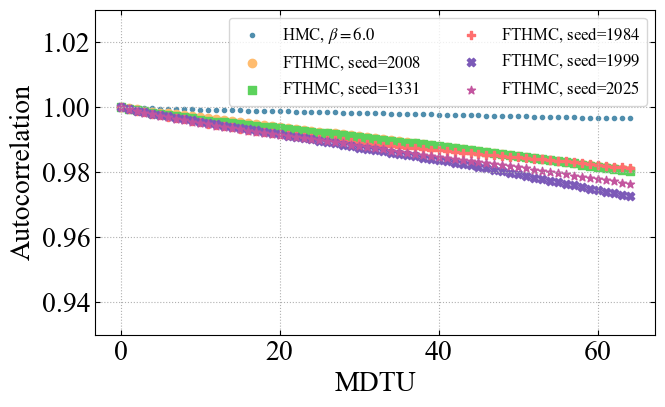

In [8]:
hmc_L64_b6_topo = np.loadtxt('/eagle/fthmc/run/Scaling_FT_HMC/scaling/dumps/topo_hmc_L64_beta6.0.csv')
fthmc_base_L64_b6_topo_2008 = np.loadtxt('/eagle/fthmc/run/Scaling_FT_HMC/scaling/dumps/topo_fthmc_L64_beta6.0_base_train_b3.0_L32_2008.csv')
fthmc_base_L64_b6_topo_1331 = np.loadtxt('/eagle/fthmc/run/Scaling_FT_HMC/scaling/dumps/topo_fthmc_L64_beta6.0_base_train_b3.0_L32_1331.csv')
fthmc_base_L64_b6_topo_1984 = np.loadtxt('/eagle/fthmc/run/Scaling_FT_HMC/scaling/dumps/topo_fthmc_L64_beta6.0_base_train_b3.0_L32_1984.csv')
fthmc_base_L64_b6_topo_1999 = np.loadtxt('/eagle/fthmc/run/Scaling_FT_HMC/scaling/dumps/topo_fthmc_L64_beta6.0_base_train_b3.0_L32_1999.csv')
fthmc_base_L64_b6_topo_2025 = np.loadtxt('/eagle/fthmc/run/Scaling_FT_HMC/scaling/dumps/topo_fthmc_L64_beta6.0_base_train_b3.0_L32_2025.csv')

max_lag = 64
beta = 6.0
volume = 64**2

hmc_L64_b6_auto = auto_from_chi(hmc_L64_b6_topo, max_lag=max_lag, beta=beta, volume=volume)
fthmc_base_L64_b6_auto_2008 = auto_from_chi(fthmc_base_L64_b6_topo_2008, max_lag=max_lag, beta=beta, volume=volume)
fthmc_base_L64_b6_auto_1331 = auto_from_chi(fthmc_base_L64_b6_topo_1331, max_lag=max_lag, beta=beta, volume=volume)
fthmc_base_L64_b6_auto_1984 = auto_from_chi(fthmc_base_L64_b6_topo_1984, max_lag=max_lag, beta=beta, volume=volume)
fthmc_base_L64_b6_auto_1999 = auto_from_chi(fthmc_base_L64_b6_topo_1999, max_lag=max_lag, beta=beta, volume=volume)
fthmc_base_L64_b6_auto_2025 = auto_from_chi(fthmc_base_L64_b6_topo_2025, max_lag=max_lag, beta=beta, volume=volume)


fig, ax = default_plot()
ax.scatter(np.arange(len(hmc_L64_b6_auto)), hmc_L64_b6_auto, label='HMC, $\\beta=6.0$', marker=marker_ls[0], color=color_ls[0])
ax.scatter(np.arange(len(fthmc_base_L64_b6_auto_2008)), fthmc_base_L64_b6_auto_2008, label='FTHMC, seed=$2008$', marker=marker_ls[1], color=color_ls[1])
ax.scatter(np.arange(len(fthmc_base_L64_b6_auto_1331)), fthmc_base_L64_b6_auto_1331, label='FTHMC, seed=$1331$', marker=marker_ls[2], color=color_ls[2])
ax.scatter(np.arange(len(fthmc_base_L64_b6_auto_1984)), fthmc_base_L64_b6_auto_1984, label='FTHMC, seed=$1984$', marker=marker_ls[3], color=color_ls[3])
ax.scatter(np.arange(len(fthmc_base_L64_b6_auto_1999)), fthmc_base_L64_b6_auto_1999, label='FTHMC, seed=$1999$', marker=marker_ls[4], color=color_ls[4])
ax.scatter(np.arange(len(fthmc_base_L64_b6_auto_2025)), fthmc_base_L64_b6_auto_2025, label='FTHMC, seed=$2025$', marker=marker_ls[5], color=color_ls[5])


ax.set_ylim(0.93, 1.03)
ax.legend(ncol=2, loc='upper right', fontsize=12)
ax.set_xlabel('MDTU', **fs_p)
ax.set_ylabel('Autocorrelation', **fs_p)
plt.tight_layout()
plt.savefig('plots/autocorrelation_L64_b6.pdf', transparent=True)
plt.show()


In [9]:
gamma_hmc = 1 / (1 - hmc_L64_b6_auto[16])
gamma_fthmc_2008 = 1 / (1 - fthmc_base_L64_b6_auto_2008[16])
gamma_fthmc_1331 = 1 / (1 - fthmc_base_L64_b6_auto_1331[16])
gamma_fthmc_1984 = 1 / (1 - fthmc_base_L64_b6_auto_1984[16])
gamma_fthmc_1999 = 1 / (1 - fthmc_base_L64_b6_auto_1999[16])
gamma_fthmc_2025 = 1 / (1 - fthmc_base_L64_b6_auto_2025[16])

gamma_ratio_2008 = gamma_hmc / gamma_fthmc_2008
gamma_ratio_1331 = gamma_hmc / gamma_fthmc_1331
gamma_ratio_1984 = gamma_hmc / gamma_fthmc_1984
gamma_ratio_1999 = gamma_hmc / gamma_fthmc_1999
gamma_ratio_2025 = gamma_hmc / gamma_fthmc_2025

gamma_ratio_L64_b6_mean = np.mean([gamma_ratio_2008, gamma_ratio_1331, gamma_ratio_1984, gamma_ratio_1999, gamma_ratio_2025])
gamma_ratio_L64_b6_std = np.std([gamma_ratio_2008, gamma_ratio_1331, gamma_ratio_1984, gamma_ratio_1999, gamma_ratio_2025])


print(">>> gamma ratio (16)")
print(f"gamma ratio (16) for L64 b6: {gamma_ratio_2008}, {gamma_ratio_1331}, {gamma_ratio_1984}, {gamma_ratio_1999}, {gamma_ratio_2025}")
print(f"mean(16) for L64 b6: {gamma_ratio_L64_b6_mean}")
print(f"std(16) for L64 b6: {gamma_ratio_L64_b6_std}")

deltaQ_hmc = [ abs(hmc_L64_b6_topo[i] - hmc_L64_b6_topo[i-1]) for i in range(1, len(hmc_L64_b6_topo))]
deltaQ_fthmc_2008 = [ abs(fthmc_base_L64_b6_topo_2008[i] - fthmc_base_L64_b6_topo_2008[i-1]) for i in range(1, len(fthmc_base_L64_b6_topo_2008))]
deltaQ_fthmc_1331 = [ abs(fthmc_base_L64_b6_topo_1331[i] - fthmc_base_L64_b6_topo_1331[i-1]) for i in range(1, len(fthmc_base_L64_b6_topo_1331))]
deltaQ_fthmc_1984 = [ abs(fthmc_base_L64_b6_topo_1984[i] - fthmc_base_L64_b6_topo_1984[i-1]) for i in range(1, len(fthmc_base_L64_b6_topo_1984))]
deltaQ_fthmc_1999 = [ abs(fthmc_base_L64_b6_topo_1999[i] - fthmc_base_L64_b6_topo_1999[i-1]) for i in range(1, len(fthmc_base_L64_b6_topo_1999))]
deltaQ_fthmc_2025 = [ abs(fthmc_base_L64_b6_topo_2025[i] - fthmc_base_L64_b6_topo_2025[i-1]) for i in range(1, len(fthmc_base_L64_b6_topo_2025))]

deltaQ_hmc_L64_b6_mean = np.mean(deltaQ_hmc)
deltaQ_fthmc_L64_b6_mean = np.mean([np.mean(deltaQ_fthmc_2008), np.mean(deltaQ_fthmc_1331), np.mean(deltaQ_fthmc_1984), np.mean(deltaQ_fthmc_1999), np.mean(deltaQ_fthmc_2025)])
deltaQ_fthmc_L64_b6_std = np.std([np.mean(deltaQ_fthmc_2008), np.mean(deltaQ_fthmc_1331), np.mean(deltaQ_fthmc_1984), np.mean(deltaQ_fthmc_1999), np.mean(deltaQ_fthmc_2025)])

print("\n>>> deltaQ")
print(f"deltaQ for HMC L64 b6: {np.mean(deltaQ_hmc)}")
print(f"deltaQ for FTHMC L64 b6: {np.mean(deltaQ_fthmc_2008)}, {np.mean(deltaQ_fthmc_1331)}, {np.mean(deltaQ_fthmc_1984)}, {np.mean(deltaQ_fthmc_1999)}, {np.mean(deltaQ_fthmc_2025)}")
print(f"mean(deltaQ) for FTHMC L64 b6: {deltaQ_fthmc_L64_b6_mean}")
print(f"std(deltaQ) for FTHMC L64 b6: {deltaQ_fthmc_L64_b6_std}")

>>> gamma ratio (16)
gamma ratio (16) for L64 b6: 4.712499999999921, 5.29999999999987, 6.718749999999817, 6.612499999999856, 6.987499999999775
mean(16) for L64 b6: 6.066249999999847
std(16) for L64 b6: 0.8936022605163443

>>> deltaQ
deltaQ for HMC L64 b6: 0.005860805860805861
deltaQ for FTHMC L64 b6: 0.013431013431013432, 0.01904761904761905, 0.022954822954822957, 0.023931623931623933, 0.024664224664224663
mean(deltaQ) for FTHMC L64 b6: 0.020805860805860808
std(deltaQ) for FTHMC L64 b6: 0.004165457789542446


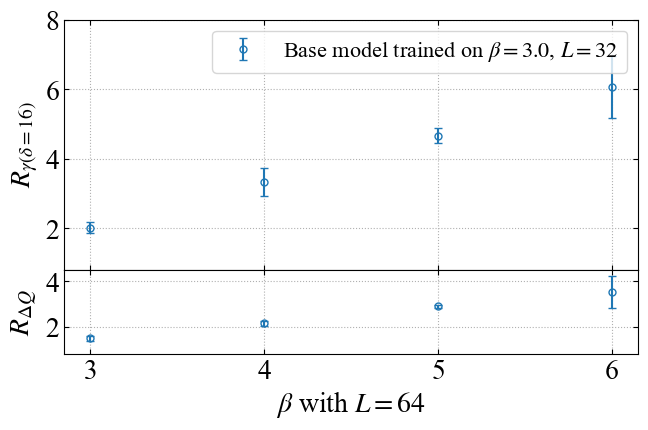

In [12]:

fig, (ax1, ax2) = default_sub_plot()
# Adjust subplot spacing
plt.subplots_adjust(left=0.1,    # Increase left margin
                    right=0.95,    # Decrease right margin
                    bottom=0.15,   # Increase bottom margin 
                    top=0.95)      # Decrease top margin

ax1.errorbar(np.arange(3, 7), [gamma_ratio_L64_b3_mean, gamma_ratio_L64_b4_mean, gamma_ratio_L64_b5_mean, gamma_ratio_L64_b6_mean], yerr=[gamma_ratio_L64_b3_std, gamma_ratio_L64_b4_std, gamma_ratio_L64_b5_std, gamma_ratio_L64_b6_std], label='Base model trained on $\\beta=3.0$, $L=32$', **errorb_circle)
ax2.errorbar(np.arange(3, 7), [deltaQ_fthmc_L64_b3_mean / deltaQ_hmc_L64_b3_mean, deltaQ_fthmc_L64_b4_mean / deltaQ_hmc_L64_b4_mean, deltaQ_fthmc_L64_b5_mean / deltaQ_hmc_L64_b5_mean, deltaQ_fthmc_L64_b6_mean / deltaQ_hmc_L64_b6_mean], yerr=[deltaQ_fthmc_L64_b3_std / deltaQ_hmc_L64_b3_mean, deltaQ_fthmc_L64_b4_std / deltaQ_hmc_L64_b4_mean, deltaQ_fthmc_L64_b5_std / deltaQ_hmc_L64_b5_mean, deltaQ_fthmc_L64_b6_std / deltaQ_hmc_L64_b6_mean], **errorb_circle)
ax1.set_ylabel('$R_{\\gamma (\\delta =16)}$', **fs_p)
ax1.set_ylim(0.8, 8)
ax2.set_xlabel('$\\beta$ with $L=64$', **fs_p)
ax2.set_ylabel('$R_{\\Delta Q}$', **fs_p)
ax2.set_ylim(0.8, 4.5)
ax1.legend(ncol=2, loc='upper right', **fs_small_p)
# plt.tight_layout()
plt.savefig('plots/performance_L64.pdf', transparent=True)
plt.show()